<a href="https://colab.research.google.com/github/KendiKabuli/House-price-prediction/blob/main/Student_scores_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Step 1: Import the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

###Step 2: Load your dataset

In [4]:
data = pd.read_csv('/content/Original_data_with_more_rows.csv')
print(data.head())
print(data.tail())

   Unnamed: 0  Gender EthnicGroup  ... MathScore ReadingScore WritingScore
0           0  female     group B  ...        72           72           74
1           1  female     group C  ...        69           90           88
2           2  female     group B  ...        90           95           93
3           3    male     group A  ...        47           57           44
4           4    male     group C  ...        76           78           75

[5 rows x 9 columns]
       Unnamed: 0  Gender EthnicGroup  ... MathScore ReadingScore WritingScore
30636         995    male     group C  ...        56           47           51
30637         996    male     group E  ...        74           75           72
30638         997    male     group C  ...        36           29           27
30639         998    male     group A  ...        43           34           39
30640         999  female     group D  ...        52           68           66

[5 rows x 9 columns]


In [7]:
print(data.columns)

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')


###Step 3: Convert Categorical features to numbers

In [8]:
# Gender: female=1, male=0
data['Gender_num'] = data['Gender'].map({'female':1, 'male':0})

# TestPrep: completed=1, none=0
data['TestPrep_num'] = data['TestPrep'].map({'completed':1, 'none':0})

# ParentEduc: map to numbers (simplified)
educ_map = {
    'some_highschool':1,
    'high school':2,
    'some college':3,
    "associate's degree":4,
    "bachelor's degree":5,
    "master's degree":6
}
data['ParentEduc_num'] = data['ParentEduc'].map(educ_map)


###Step 4: Keep rows with no missing values

In [9]:
cols_needed = ['MathScore', 'Gender_num', 'TestPrep_num', 'ParentEduc_num']
data_small = data[cols_needed].dropna()


###Step 5: Split features and target

In [10]:
X = data_small[['Gender_num','TestPrep_num','ParentEduc_num']]
y = data_small['MathScore']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


###Step 6: Train the linear regression model

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Step 7: Prediction and evaluation

In [15]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.2f}")  # average prediction error
print(f"Test R² : {r2:.3f}")    # how much variation in scores model explains

Test RMSE: 216.65
Test R² : 0.074


###Step 8: Check coefficients

In [16]:
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: coef = {coef:.3f}")
print("Intercept:", model.intercept_)


Gender_num: coef = -5.092
TestPrep_num: coef = 4.337
ParentEduc_num: coef = 1.951
Intercept: 61.77329964902733


###Step 9: Predict a new student

In [17]:
new_student = pd.DataFrame([{
    'Gender_num': 1,        # female
    'TestPrep_num': 1,      # completed
    'ParentEduc_num': 3     # some college
}])

predicted_score = model.predict(new_student)[0]
print(f"Predicted MathScore for the new student: {predicted_score:.1f}")


Predicted MathScore for the new student: 66.9


In [18]:
new_student = pd.DataFrame([{
    'Gender_num': 0,        # male
    'TestPrep_num': 0,      # not completed
    'ParentEduc_num': 6     # masters degree
}])

predicted_score = model.predict(new_student)[0]
print(f"Predicted MathScore for the new student: {predicted_score:.1f}")


Predicted MathScore for the new student: 73.5


In [19]:
new_student = pd.DataFrame([{
    'Gender_num': 0,        # male
    'TestPrep_num': 0,      # not completed
    'ParentEduc_num': 1     # some highschool
}])

predicted_score = model.predict(new_student)[0]
print(f"Predicted MathScore for the new student: {predicted_score:.1f}")


Predicted MathScore for the new student: 63.7


###Step 10: Visualize actual vs predicted

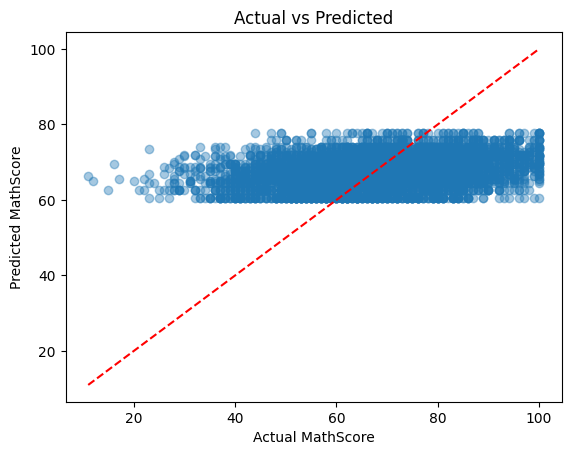

In [20]:
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual MathScore")
plt.ylabel("Predicted MathScore")
plt.title("Actual vs Predicted")
plt.show()
